In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sys
sys.path.append('../src/')
from helper_functions import *
plt.style.use('dynamics_site')
import time

In [14]:
def integrate_rk4(system,dt,steps):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    for i in range(steps-1):
        k1_vi = dt*get_acclerations(rvec,mvec)
        k1_ri = dt*vvec
        
        k2_vi = dt*get_acclerations(rvec +(1/5)*k1_ri,mvec)
        k2_ri = dt*(vvec                 +(1/5)*k1_vi)

        k3_vi = dt*get_acclerations(rvec +(3/40)*k1_ri + (9/40)*k2_ri,mvec)
        k3_ri = dt*(vvec                 +(3/40)*k1_vi + (9/40)*k2_vi)

        k4_vi = dt*get_acclerations(rvec +(44/45)*k1_ri - (56/15)*k2_ri + (32/9)*k3_ri,mvec)
        k4_ri = dt*(vvec                 +(44/45)*k1_vi - (56/15)*k2_vi + (32/9)*k3_vi)

        k5_vi = dt*get_acclerations(rvec +(19372/6561)*k1_ri - (25360/2187)*k2_ri + (64448/6561)*k3_ri - (212/729)*k4_ri,mvec)
        k5_ri = dt*(vvec                 +(19372/6561)*k1_vi - (25360/2187)*k2_vi + (64448/6561)*k3_vi - (212/729)*k4_vi)
                                                                            #several sources incorrectly use -(46732/5247) here!!
        k6_vi = dt*get_acclerations(rvec +(9017/3168)*k1_ri - (355/33)*k2_ri + (46732/5247)*k3_ri + (49/176)*k4_ri - (5103/18656)*k5_ri,mvec)
        k6_ri = dt*(vvec                 +(9017/3168)*k1_vi - (355/33)*k2_vi + (46732/5247)*k3_vi + (49/176)*k4_vi - (5103/18656)*k5_vi )

        k7_vi = dt*get_acclerations(rvec +(35/384)*k1_ri + (500/1113)*k3_ri + (125/192)*k4_ri - (2187/6784)*k5_ri + (11/84)*k6_ri,mvec)
        k7_ri = dt*(vvec                 +(35/384)*k1_vi + (500/1113)*k3_vi + (125/192)*k4_vi - (2187/6784)*k5_vi + (11/84)*k6_vi)

        new_vvec_order4 = vvec + (35/384)*k1_vi + (500/1113)*k3_vi + (125/192)*k4_vi - (2187/6784)*k5_vi + (11/84)*k6_vi
        new_rvec_order4 = rvec + (35/384)*k1_ri + (500/1113)*k3_ri + (125/192)*k4_ri - (2187/6784)*k5_ri + (11/84)*k6_ri
        
        Rs.append(new_rvec_order4)
        Vs.append(new_vvec_order4)
        rvec = new_rvec_order4
        vvec = new_vvec_order4

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE


In [15]:
def integrate_rk45_dp(system,dt,steps,thresh=1e-9):
    G, mvec, rvec, vvec = load_initials(system)
    Rs = [rvec]
    Vs = [vvec]
    dts = [dt]
    for i in range(steps-1):
        k1_vi = dt*get_acclerations(rvec,mvec)
        k1_ri = dt*vvec
        
        k2_vi = dt*get_acclerations(rvec +(1/5)*k1_ri,mvec)
        k2_ri = dt*(vvec                 +(1/5)*k1_vi)

        k3_vi = dt*get_acclerations(rvec +(3/40)*k1_ri + (9/40)*k2_ri,mvec)
        k3_ri = dt*(vvec                 +(3/40)*k1_vi + (9/40)*k2_vi)

        k4_vi = dt*get_acclerations(rvec +(44/45)*k1_ri - (56/15)*k2_ri + (32/9)*k3_ri,mvec)
        k4_ri = dt*(vvec                 +(44/45)*k1_vi - (56/15)*k2_vi + (32/9)*k3_vi)

        k5_vi = dt*get_acclerations(rvec +(19372/6561)*k1_ri - (25360/2187)*k2_ri + (64448/6561)*k3_ri - (212/729)*k4_ri,mvec)
        k5_ri = dt*(vvec                 +(19372/6561)*k1_vi - (25360/2187)*k2_vi + (64448/6561)*k3_vi - (212/729)*k4_vi)
                                                                            #several sources incorrectly use -(46732/5247) here!!
        k6_vi = dt*get_acclerations(rvec +(9017/3168)*k1_ri - (355/33)*k2_ri + (46732/5247)*k3_ri + (49/176)*k4_ri - (5103/18656)*k5_ri,mvec)
        k6_ri = dt*(vvec                 +(9017/3168)*k1_vi - (355/33)*k2_vi + (46732/5247)*k3_vi + (49/176)*k4_vi - (5103/18656)*k5_vi )

        k7_vi = dt*get_acclerations(rvec +(35/384)*k1_ri + (500/1113)*k3_ri + (125/192)*k4_ri - (2187/6784)*k5_ri + (11/84)*k6_ri,mvec)
        k7_ri = dt*(vvec                 +(35/384)*k1_vi + (500/1113)*k3_vi + (125/192)*k4_vi - (2187/6784)*k5_vi + (11/84)*k6_vi)

        new_vvec_order4 = vvec + (35/384)*k1_vi + (500/1113)*k3_vi + (125/192)*k4_vi - (2187/6784)*k5_vi + (11/84)*k6_vi
        new_rvec_order4 = rvec + (35/384)*k1_ri + (500/1113)*k3_ri + (125/192)*k4_ri - (2187/6784)*k5_ri + (11/84)*k6_ri
        new_vvec_order5 = vvec + (5179/57600)*k1_vi + (7571/16695)*k3_vi + (393/640)*k4_vi - (92097/339200)*k5_vi + (187/2100)*k6_vi + (1/40)*k7_vi
        new_rvec_order5 = rvec + (5179/57600)*k1_ri + (7571/16695)*k3_ri + (393/640)*k4_ri - (92097/339200)*k5_ri + (187/2100)*k6_ri + (1/40)*k7_ri

        maxerr = np.max([new_vvec_order5-new_vvec_order4,new_rvec_order5-new_rvec_order4])
        dt_new = (thresh/maxerr)**(1/5) * dt
        
        Rs.append(new_rvec_order4)
        Vs.append(new_vvec_order4)
        dts.append(dt_new)
        rvec = new_rvec_order4
        vvec = new_vvec_order4
        dt = dt_new

    Rs = np.array(Rs)
    Vs = np.array(Vs)
    PE = get_PE(Rs,mvec)
    KE = get_KE(Vs,mvec)
    
    Rs = np.array([Rs[j].T for j in range(len(Rs))])
    Vs = np.array([Vs[j].T for j in range(len(Rs))])
    return Rs,Vs,PE+KE,dts


In [18]:
dts = np.logspace(-0.5,-2,15)
steps = (1/dts).astype(int) #run simulation for 1 year
E_rk4 = []
T_rk4 = []

for i in range(len(dts)):
    dt = dts[i]
    step = steps[i]
    
    start = time.time()
    _,_,Es = integrate_rk4('../src/Comet-Sun.npy',dt,step)
    end = time.time()
    T_rk4.append(end-start)
    E_rk4.append(np.abs(Es[0]-Es[-1]))
    
start = time.time()
_,_,Es,_ = integrate_rk45_dp('../src/Comet-Sun.npy',0.01,step)
end = time.time()
T_rk45dp = (end-start)
E_rk45dp = (np.abs(Es[0]-Es[-1]))


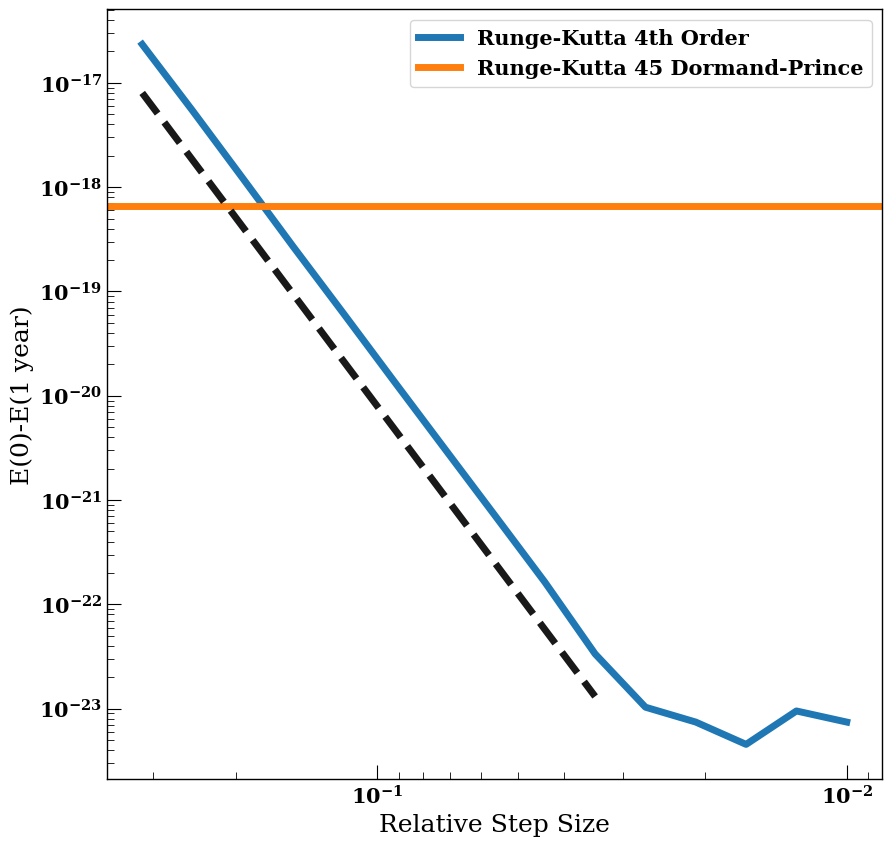

In [27]:
fig,ax = plt.subplots(figsize=(10,10))
plt.plot(dts,E_rk4,label='Runge-Kutta 4th Order')
plt.axhline(E_rk45dp,label='Runge-Kutta 45 Dormand-Prince',c='C1')
plt.plot(dts[:10],(dts[:10]**6)*8e-15,c='k',ls='--',alpha=0.9)
plt.xscale('log')
plt.yscale('log')

plt.gca().invert_xaxis()
plt.xlabel("Relative Step Size")
plt.ylabel("E(0)-E(1 year)")
ax.legend(loc='best')
plt.savefig('ERK_errorstep.png')